In [1]:

import ld_dataset
import Similarity_recomm
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

def main():
    print ('\n**************************************************************************************************')
    print('******************* WELCOME TO THE ARTIST AND MUSIC RECOMMENDATION SYSTEM*************************')
    print ('**************************************************************************************************\n')
    
    #declare variable to indicate if the user is continuing with querying the choices for recommendations
    stay_on_course = 'y'
    choice = int(input('Press 1 if you like to see recommendations corresponding to an artist OR Press 2 if you like to see recommendations corresponding to a music: '))
    
    #create object corresponding to class csv_read that reads the data from the input file and stores to dataframe and get the dataframe
    music_features = pd.DataFrame()
    music_data = ld_dataset.csv_read('data1.csv', music_features)  
    music_features = music_data.get_data_frame()
    #print(music_features)
    
    #initialize and generate the artist_music dictionary by utilizing the sub class create_dict of csv_read class
    Artist_music = {}
    create_artist_music = ld_dataset.create_dict('data1.csv', music_features, Artist_music)
    artist_music = create_artist_music.get_artist_features(Artist_music, music_features)
    #print(artist_music)
    
    #initialize and generate the dataframe artist_music_features which has each row has unique artist name, list of all songs by the artist and, all the music features
    artist_music_features = pd.DataFrame
    #artist_music_features = pd.DataFrame
    create_artist_music_features_df = ld_dataset.create_artist_music_feature('data1.csv', music_features, Artist_music, artist_music_features)
    artist_music_features = create_artist_music_features_df.build_artist_music_features(music_features, Artist_music, artist_music_features)
    #print(artist_music_features)
    if choice == 1:
        artist_name = input("Please enter the artist name: ")
        number_items_todisplay = int(input("Please enter the number of items to display: "))
        preferred_similarity_matrix = input("Please mention the preferred similarity matrix(1: Euclidean, 2: Cosine, 3: Manhattan, 4: Pearson, 5: Jaccard ): ")

        #get the dataframe row corresponding to the artist name entered by the user and store in a dataframe
        artist_df = artist_music_features.loc[music_features['artists'].str.contains(artist_name)]

        #Create numpy arrays from the master dataframe and the dataframe created corresponding to the artist name chosen
        array_artist_music_features = artist_music_features[['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']].to_numpy()
        array_artist_df = artist_df[['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']].to_numpy()

        #define objects corresponding to the classes corresponding to the similarity/distance calculation
        artist_distance = Similarity_recomm.distance_quest(array_artist_music_features, array_artist_df)
        artist_euclidean = Similarity_recomm.euc_distance(array_artist_music_features, array_artist_df)
        artist_cosine = Similarity_recomm.cos_distance(array_artist_music_features, array_artist_df)
        artist_manhattan = Similarity_recomm.manhattan_distance(array_artist_music_features, array_artist_df)
        artist_jaccard = Similarity_recomm.jaccard_distance(array_artist_music_features, array_artist_df)
        artist_pearson = Similarity_recomm.pearson_distance(array_artist_music_features, array_artist_df)

        artist_euc_dist = artist_euclidean.find_distance(array_artist_music_features, array_artist_df)
        #print(artist_euc_dist)
        artist_cos_dist = artist_cosine.find_distance(array_artist_music_features,array_artist_df)
        artist_manhattan_dist = artist_manhattan.find_distance(array_artist_music_features,array_artist_df)
        artist_pearson_dist = artist_pearson.find_distance(array_artist_music_features,array_artist_df)
        artist_jaccard_dist = artist_jaccard.find_distance(array_artist_music_features,array_artist_df)

        #create a temperory dataframe to store all the similarity matrices corresponding to each artist
        temp_artist_distance_df = artist_music_features

        #create objects for the classes corresponding to building the dataframe having similarity matrices added in
        artist_distance_matrix = Similarity_recomm.dist_Matrix_df(artist_music_features, temp_artist_distance_df, artist_euc_dist, artist_cos_dist, artist_manhattan_dist, artist_pearson_dist, artist_jaccard_dist)
        euc_sort_matrix = Similarity_recomm.euc_matrix_df(artist_music_features, temp_artist_distance_df, artist_euc_dist, artist_cos_dist, artist_manhattan_dist, artist_pearson_dist, artist_jaccard_dist)
        cos_sort_matrix = Similarity_recomm.cos_matrix_df(artist_music_features, temp_artist_distance_df, artist_euc_dist, artist_cos_dist, artist_manhattan_dist, artist_pearson_dist, artist_jaccard_dist)
        manhattan_sort_matrix = Similarity_recomm.manhattan_matrix_df(artist_music_features, temp_artist_distance_df, artist_euc_dist, artist_cos_dist, artist_manhattan_dist, artist_pearson_dist, artist_jaccard_dist)
        jaccard_sort_matrix = Similarity_recomm.jaccard_matrix_df(artist_music_features, temp_artist_distance_df, artist_euc_dist, artist_cos_dist, artist_manhattan_dist, artist_pearson_dist, artist_jaccard_dist)
        pearson_sort_matrix = Similarity_recomm.pearson_matrix_df(artist_music_features, temp_artist_distance_df, artist_euc_dist, artist_cos_dist, artist_manhattan_dist, artist_pearson_dist, artist_jaccard_dist)

        temp_artist_distance_df = artist_distance_matrix.build_dist_matrix(artist_music_features, temp_artist_distance_df, artist_euc_dist, artist_cos_dist, artist_manhattan_dist, artist_pearson_dist, artist_jaccard_dist)
        #print(temp_artist_distance_df)

                
        #sort the dataframe based on the preferred similarity matrix, so that we could display the recommendations    
        if int(preferred_similarity_matrix) == 1:
            sorted_artist_distance = euc_sort_matrix.sort_df(temp_artist_distance_df)
            #print(sorted_artist_distance)
        elif int(preferred_similarity_matrix) ==2:
            sorted_artist_distance = cos_sort_matrix.sort_df(temp_artist_distance_df)
            #print(sorted_artist_distance)
        elif int(preferred_similarity_matrix) ==3:
            sorted_artist_distance = manhattan_sort_matrix.sort_df(temp_artist_distance_df)
            #print(sorted_artist_distance)
        elif int(preferred_similarity_matrix) ==4:
            sorted_artist_distance = pearson_sort_matrix.sort_df(temp_artist_distance_df)
            #print(sorted_artist_distance)        
        elif int(preferred_similarity_matrix) ==5:
            sorted_artist_distance = jaccard_sort_matrix.sort_df(temp_artist_distance_df)
            #print(sorted_artist_distance) 

        #create arguemnts and object for the class that generates recommendations
        artist_list = list()
        music_list = list()
        music_name = ''
        artist_recommendations = Similarity_recomm.recommendations(sorted_artist_distance, artist_name, music_name, int(number_items_todisplay), artist_list, music_list) 
         
        n = int(number_items_todisplay)
        print("\n The top ",number_items_todisplay, " artists recommendations corresponding to ", artist_name, " are: " )
        print(artist_recommendations.get_top_n_artists(sorted_artist_distance, int(number_items_todisplay), artist_name))
        print("\n The top ",number_items_todisplay, " music recommendations corresponding to ", artist_name, " are: " )
        print(artist_recommendations.get_top_n_music_frm_artists(sorted_artist_distance, int(number_items_todisplay), artist_name))
        
        print("\n", artist_name, " - Similarity scores comparison with each recommended artist: ")
        #slice the sorted dataframe by the number of rows = number of artists displayed and generate the graph showing the accuracy/difference among different similarity scores
        sliced_artist_df = sorted_artist_distance.iloc[1:n+1, 0:7]
        sliced_artist_df = sliced_artist_df.drop(columns = ['name'])
        #print(sliced_music_df)
        sliced_artist_df.plot(x = 'artists', kind='bar')
        plt.show()
            
    elif choice == 2:
                
        music_name = input("Please enter the music name: ")
        number_items_todisplay = input("Please enter the number of items to display: ")
        preferred_similarity_matrix = input("Please mention the preferred similarity matrix(1: Euclidean, 2: Cosine, 3: Manhattan, 4: Pearson, 5: Jaccard ): ")

        #get the dataframe row corresponding to the music name entered by the user and store in another dataframe
        music_df = music_features.loc[music_features['name'].str.contains(music_name)]

        #Create numpy arrays from the master dataframe and the dataframe created corresponding to the music name chosen
        array_music_features = music_features[['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']].to_numpy()
        array_music_df = music_df[['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']].to_numpy()

        #define objects corresponding to the classes corresponding to the similarity/distance calculation
        music_distance = Similarity_recomm.distance_quest(array_music_features, array_music_df)
        music_euclidean = Similarity_recomm.euc_distance(array_music_features, array_music_df)
        music_cosine = Similarity_recomm.cos_distance(array_music_features, array_music_df)
        music_manhattan = Similarity_recomm.manhattan_distance(array_music_features, array_music_df)
        music_jaccard = Similarity_recomm.jaccard_distance(array_music_features, array_music_df)
        music_pearson = Similarity_recomm.pearson_distance(array_music_features, array_music_df)

        music_euc_dist = music_euclidean.find_distance(array_music_features, array_music_df)
        #print(music_euc_dist)
        music_cos_dist = music_cosine.find_distance(array_music_features, array_music_df)
        music_manhattan_dist = music_manhattan.find_distance(array_music_features, array_music_df)
        music_pearson_dist = music_pearson.find_distance(array_music_features, array_music_df)
        music_jaccard_dist = music_jaccard.find_distance(array_music_features, array_music_df)

        #create a temperory dataframe to store all the similarity matrices corresponding to each music
        temp_music_distance_df = music_features

        #create objects for the classes corresponding to building the dataframe having similarity matrices added in
        music_distance_matrix = Similarity_recomm.dist_Matrix_df(music_features, temp_music_distance_df, music_euc_dist, music_cos_dist, music_manhattan_dist, music_pearson_dist, music_jaccard_dist)
        euc_sort_matrix = Similarity_recomm.euc_matrix_df(music_features, temp_music_distance_df, music_euc_dist, music_cos_dist, music_manhattan_dist, music_pearson_dist, music_jaccard_dist)
        cos_sort_matrix = Similarity_recomm.cos_matrix_df(music_features, temp_music_distance_df, music_euc_dist, music_cos_dist, music_manhattan_dist, music_pearson_dist, music_jaccard_dist)
        manhattan_sort_matrix = Similarity_recomm.manhattan_matrix_df(music_features, temp_music_distance_df, music_euc_dist, music_cos_dist, music_manhattan_dist, music_pearson_dist, music_jaccard_dist)
        jaccard_sort_matrix = Similarity_recomm.jaccard_matrix_df(music_features, temp_music_distance_df, music_euc_dist, music_cos_dist, music_manhattan_dist, music_pearson_dist, music_jaccard_dist)
        pearson_sort_matrix = Similarity_recomm.pearson_matrix_df(music_features, temp_music_distance_df, music_euc_dist, music_cos_dist, music_manhattan_dist, music_pearson_dist, music_jaccard_dist)

        temp_music_distance_df = music_distance_matrix.build_dist_matrix(music_features, temp_music_distance_df, music_euc_dist, music_cos_dist, music_manhattan_dist, music_pearson_dist, music_jaccard_dist)
        #print(temp_music_distance_df)
                
        #sort the dataframe based on the preferred similarity matrix, so that we could display the recommendations    
        if int(preferred_similarity_matrix) == 1:
            sorted_music_distance = euc_sort_matrix.sort_df(temp_music_distance_df)
            #print(sorted_music_distance)
        elif int(preferred_similarity_matrix) ==2:
            sorted_music_distance = cos_sort_matrix.sort_df(temp_music_distance_df)
            #print(sorted_music_distance)
        elif int(preferred_similarity_matrix) ==3:
            sorted_music_distance = manhattan_sort_matrix.sort_df(temp_music_distance_df)
            #print(sorted_music_distance)
        elif int(preferred_similarity_matrix) ==4:
            sorted_music_distance = pearson_sort_matrix.sort_df(temp_music_distance_df)
            #print(sorted_music_distance)        
        elif int(preferred_similarity_matrix) ==5:
            sorted_music_distance = jaccard_sort_matrix.sort_df(temp_music_distance_df)
            #print(sorted_music_distance) 

        #create arguemnts and object for the class that generates recommendations
        artist_list = list()
        music_list = list()
        artist_name = ''
        music_recommendations = Similarity_recomm.recommendations(sorted_music_distance, artist_name, music_name, int(number_items_todisplay), artist_list, music_list) 
                
        print("\n The top ",number_items_todisplay, " song recommendations corresponding to ", music_name, " are: " )
        print(music_recommendations.get_top_n_music_frm_music(sorted_music_distance, int(number_items_todisplay), music_name))
   
        #slice the sorted dataframe by the number of rows = number of items displayed and generate the graph showing the accuracy/difference among different similarity scores
        n = int(number_items_todisplay)
        print("\n",music_name, " - Similarity scores comparison with each recommended song: ")
        sliced_music_df = sorted_music_distance.iloc[1:n+1, 1:7]
        #print(sliced_music_df)
        sliced_music_df.plot(x = 'name', kind='bar')
        plt.show()
        
        #sliced_music_df_euc_manhattan = sliced_music_df[["name", "euclidean", "manhattan"]]
        #sliced_music_df_euc_manhattan.plot(x = 'name', kind='bar')
        #plt.show()
        
        #sliced_music_cos_pear_jaccard = sliced_music_df[["name", "cosine", "pearson", "jaccard"]]
        #sliced_music_cos_pear_jaccard.plot(x = 'name', kind='bar')
        #plt.show()
        


**************************************************************************************************
******************* WELCOME TO THE ARTIST AND MUSIC RECOMMENDATION SYSTEM*************************
**************************************************************************************************

Press 1 if you like to see recommendations corresponding to an artist OR Press 2 if you like to see recommendations corresponding to a music: 1
Please enter the artist name: Charlo
Please enter the number of items to display: 3
Please mention the preferred similarity matrix(1: Euclidean, 2: Cosine, 3: Manhattan, 4: Pearson, 5: Jaccard ): 3

 The top  3  artists recommendations corresponding to  Charlo  are: 
['Carl Woitschach', 'Francisco Canaro', 'Felix Mendelssohn']

 The top  3  music recommendations corresponding to  Charlo  are: 
['Singende Bataillone 1. Teil', 'Per aspera ad astra', 'Bebamos Juntos - Instrumental (Remasterizado)', 'Moneda Corriente - Remasterizado']

 Charlo  - Similari

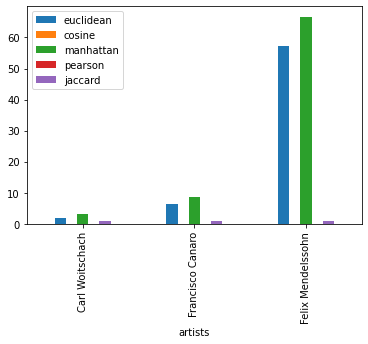

In [29]:
main()